#  AI Pathologist 
## For Invasive Ductal Carcinoma Detection

### Background

Invasive ductal carcinoma (IDC), also known as infiltrating ductal carcinoma, is cancer that began growing in a milk duct and has invaded the fibrous or fatty tissue of the breast outside of the duct. 

Invasive means that the cancer has “invaded” or spread to the surrounding breast tissues. 

Ductal means that the cancer began in the milk ducts, which are the “pipes” that carry milk from the milk-producing lobules to the nipple. 

Carcinoma refers to any cancer that begins in the skin or other tissues that cover internal organs, such as breast tissue. 

All together, “invasive ductal carcinoma” refers to cancer that has broken through the walls of the milk ducts and begun to invade the tissues of the breast. 

Over time, invasive ductal carcinoma can spread to the lymph nodes and possibly to other areas of the body. 

IDC starts in the cells that line a milk duct in the breast, breaks through the wall of the duct, and grows into the nearby breast tissues. 

At this point, it may be able to spread (metastasize) to other parts of the body through the lymph system and bloodstream.

According to the American Cancer Society, about two-thirds of women are 55 or older when they are diagnosed with invasive breast cancer. 

Invasive ductal carcinoma also affects men.

### Problem

Invasive ductal carcinoma is the most common form of invasive breast cancer and represents 80 percent of breast cancer cases/diagnoses.

More women are diagnosed with breast cancer than any other cancer, besides skin cancer. As with any breast cancer, there may be no signs or symptoms. 

A mammogram may reveal a suspicious mass, which will lead to further testing including biopsies, which involve taking out some or all of the abnormal-looking tissue for examination by a pathologist (a doctor trained to diagnose cancer from biopsy samples) under a microscope. 

More than 1 million women have breast biopsies each year in the United States. 

About 20 percent of these biopsies yield a diagnosis of breast cancer. 

This year, an estimated 268,600 women in the United States will be diagnosed with invasive breast cancer and 2,670 men in the United States will be diagnosed with breast cancer.

It is estimated that 42,260 deaths (41,760 women and 500 men) from breast cancer will occur this year. 

### Data

I would like to use the 1.64GB breast histopathology image dataset provided by Kaggle: https://www.kaggle.com/paultimothymooney/breast-histopathology-images 

The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x.

From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). 

These pictures could be fed into an algorithm which would be able to classify whether invasive ductal carcinoma is present in an image.

### References

Breast Biopsy - 
https://www.choosingwisely.org/patient-resources/breast-biopsy/

Breast Cancer - Statistics - 
https://www.cancer.net/cancer-types/breast-cancer/statistics

Breast Histopathology Images - Paul Mooney - 
https://www.kaggle.com/paultimothymooney/breast-histopathology-images

Information and Resources About For Cancer: Breast, Colon, Lung, Prostate, Skin - 
https://www.cancer.org/

Invasive Ductal Carcinoma: Diagnosis, Treatment, and More - 
https://www.breastcancer.org/symptoms/types/idc

Invasive Ductal Carcinoma (idc) Breast Cancer: Johns Hopkins Breast Center - Ken Brown -https://www.hopkinsmedicine.org/breast_center/breast_cancers_other_conditions/invasive_ductal_carcinoma.html

## Imports and Dependencies


In [0]:
!pip3 -q install tensorflow==1.14.0

In [0]:
!pip3 -q install keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2

In [0]:
tf.__version__

'1.14.0'

In [0]:
tf.keras.__version__

'2.2.4-tf'

## Data Extraction

In [0]:
# upload zipped IDC_regular_ps50_idx5.zip before this step
!unzip -o -q IDC_regular_ps50_idx5.zip

# -f  freshen existing files, create none
# -n  never overwrite existing files
# -q  quiet mode (-qq => quieter)
# -o  overwrite files WITHOUT prompting

## Copy Data Into Directories

all_images_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images



In [0]:
# Create a new directory to store all available images
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

# Create Positive subdirectory within all images
os.mkdir('all_images_dir/1')

os.mkdir('all_images_dir/0')

In [0]:
# copies all images from their seperate folders into the same 
# folder called all_images_dir


# create a list of all patient id's
# each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

cur_dir = os.getcwd()
patient_list = os.listdir(cur_dir)

for patient in patient_list:
  
  try:
    
    path_0 = str(patient) + '/0'
    path_1 = str(patient) + '/1'

    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, '0', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, '1', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        
  except:
     print('File Cannot Be Parsed')

File Cannot Be Parsed
File Cannot Be Parsed
File Cannot Be Parsed
File Cannot Be Parsed
File Cannot Be Parsed


In [0]:
# Check how many images are in each folder

print('Total:', len(os.listdir('all_images_dir/1'))+len(os.listdir('all_images_dir/0')))
print('Positive:', len(os.listdir('all_images_dir/1')))
print('Negative:', len(os.listdir('all_images_dir/0')))

Total: 277524
Positive: 78786
Negative: 198738


## Make Dataframe of Image Info.

In [0]:
# Create a dataframe containing all the information

image_list_1 = os.listdir('all_images_dir/1')
df_data_1 = pd.DataFrame(image_list_1, columns=['image_id'])

image_list_0 = os.listdir('all_images_dir/0')
df_data_0 = pd.DataFrame(image_list_0, columns=['image_id'])

df_data = pd.concat([df_data_1, df_data_0])

In [0]:
df_data.head()

,image_id
0,9291_idx5_x2301_y1551_class1.png
1,8956_idx5_x1401_y401_class1.png
2,10276_idx5_x1101_y851_class1.png
3,12817_idx5_x651_y901_class1.png
4,14191_idx5_x2251_y2401_class1.png


In [0]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head()

,image_id,patient_id,target
0,9291_idx5_x2301_y1551_class1.png,9291,1
1,8956_idx5_x1401_y401_class1.png,8956,1
2,10276_idx5_x1101_y851_class1.png,10276,1
3,12817_idx5_x651_y901_class1.png,12817,1
4,14191_idx5_x2251_y2401_class1.png,14191,1


## Train/Valid/Test Split

In [0]:
from sklearn.model_selection import train_test_split

y = df_data['target']

_, df_test = train_test_split(df_data, test_size=0.0375, random_state=42)

_, df_val = train_test_split(df_data, test_size=0.007205, random_state=42)

print('Valid:', df_val.shape[0])
print('Test:', df_test.shape[0])

Valid: 2000
Test: 10408


In [0]:
df_val.head()

,image_id,patient_id,target
147449,9266_idx5_x2651_y351_class0.png,9266,0
73873,8863_idx5_x1551_y801_class0.png,8863,0
182840,12931_idx5_x251_y651_class0.png,12931,0
45738,14211_idx5_x2601_y2351_class0.png,14211,0
3247,9123_idx5_x1601_y2151_class0.png,9123,0


In [0]:
df_test.head()

,image_id,patient_id,target
147449,9266_idx5_x2651_y351_class0.png,9266,0
73873,8863_idx5_x1551_y801_class0.png,8863,0
182840,12931_idx5_x251_y651_class0.png,12931,0
45738,14211_idx5_x2601_y2351_class0.png,14211,0
3247,9123_idx5_x1601_y2151_class0.png,9123,0


In [0]:
def identify_train_val_and_test_rows(x):
    # create a list of all the lesion_id's in the val set and test set
    val_list = list(df_val['image_id'])
    test_list = list(df_test['image_id'])
    
    if str(x) in val_list:
        return 'val'
    if str(x) in test_list:
        return 'test'
    else:
        return 'train'

# create a new colum that is a copy of the image_id column
df_data['train_or_val_or_test'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val_or_test'] = df_data['train_or_val_or_test'].apply(identify_train_val_and_test_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val_or_test'] == 'train']

print('Train:', len(df_train))
print('Valid:', len(df_val))
print('Test:', len(df_test))

Train: 267116
Valid: 2000
Test: 10408


In [0]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)
df_data.head()

,patient_id,target,train_or_val_or_test
image_id,,,
9291_idx5_x2301_y1551_class1.png,9291,1,train
8956_idx5_x1401_y401_class1.png,8956,1,train
10276_idx5_x1101_y851_class1.png,10276,1,train
12817_idx5_x651_y901_class1.png,12817,1,train
14191_idx5_x2251_y2401_class1.png,14191,1,train
10303_idx5_x1651_y1451_class1.png,10303,1,train
8916_idx5_x251_y1001_class1.png,8916,1,train
16550_idx5_x2951_y1651_class1.png,16550,1,train
8975_idx5_x2351_y1351_class1.png,8975,1,train


## Move Train/Valid/Test Images Into Repective Directories

train_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images


val_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images


test_dir


> 1 (IDC Positive Class)

>> IDC positive images


> 0 (IDC Negative Class)

>> IDC negative images

In [0]:
# Make Train, Valid, and Test Folders

# train_dir
train_dir = os.path.join('train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join('val_dir')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join('test_dir')
os.mkdir(test_dir)


# Create folders within the train, valid, and test folders
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
os.mkdir(os.path.join(train_dir, '1'))
os.mkdir(os.path.join(train_dir, '0'))

# Create new folders inside val_dir
os.mkdir(os.path.join(val_dir, '1'))
os.mkdir(os.path.join(val_dir, '0'))

# Create new folders inside test_dir
os.mkdir(os.path.join(test_dir, '1'))
os.mkdir(os.path.join(test_dir, '0'))

In [0]:
# Get a list of train, val, and test images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

# Transfer the train images

for image in train_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    fname = image
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    fname = image
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the test images
for image in test_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    fname = image
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(test_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [0]:
print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Valid Total:', len(os.listdir('val_dir/1'))+len(os.listdir('val_dir/0')))
print('Test Total:', len(os.listdir('test_dir/1'))+len(os.listdir('test_dir/0')), '\n')

print('Train Negative:', len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')), '\n')

print('Valid Negative:', len(os.listdir('val_dir/0')))
print('Valid Positive:', len(os.listdir('val_dir/1')), '\n')

print('Test Negative:', len(os.listdir('test_dir/0')))
print('Test Positive:', len(os.listdir('test_dir/1')))

Train Total: 267116
Valid Total: 2000
Test Total: 10408 

Train Negative: 191293
Train Positive: 75823 

Valid Negative: 1459
Valid Positive: 541 

Test Negative: 7445
Test Positive: 2963


## Make Augmented Images of Underrepresented Class (IDC Positive)

In [0]:
image_size = 100

from keras.preprocessing.image import ImageDataGenerator

# create temporary directories here and delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)
# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# list all images in that directory
img_list = os.listdir('train_dir/1')

# copy images from the class all images directory to the image directory
for fname in img_list:
    # source path to image
    src = os.path.join('train_dir/1', fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = 'aug_dir'
save_path = 'train_dir/1'

# create a data generator
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

batch_size = 25

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='jpg',
                                          target_size=(image_size, image_size),
                                          batch_size=batch_size)

# generate the augmented images and add them to the folder of all images

num_aug_images_wanted = len(os.listdir('train_dir/0')) # total number of images wanted in each class

num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

for i in range(0, num_batches):
  next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')

Found 75823 images belonging to 1 classes.


In [0]:
# Check how many train images we have in each folder

print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')))
print('Train Negative:', len(os.listdir('train_dir/0')))

Train Total: 382589
Train Positive: 191296
Train Negative: 191293


## Create Train/Valid/Test Batches

In [0]:
train_path = 'train_dir'
valid_path = 'val_dir'
test_path = 'test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 500
val_batch_size = 500

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [0]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input)

train_batches_bench = datagen.flow_from_directory(train_path, 
                                                  target_size=(image_size, image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,  
                                                  target_size=(image_size, image_size),
                                                  batch_size=val_batch_size)

test_batches_bench = datagen.flow_from_directory(test_path,  
                                                 target_size=(image_size, image_size),
                                                 batch_size=1,
                                                 shuffle=False) # test dataset should not be shuffled

Found 382589 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 10408 images belonging to 2 classes.


W0705 07:57:06.140238 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


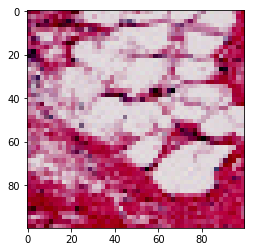

W0705 07:57:06.382710 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


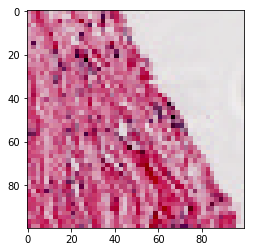

W0705 07:57:06.546266 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


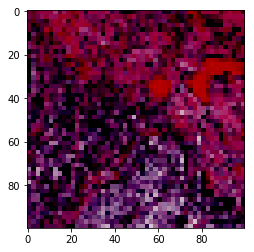

W0705 07:57:06.699985 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


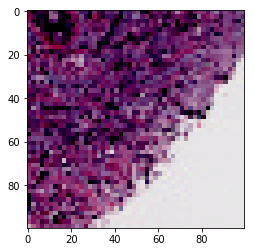

W0705 07:57:06.864153 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


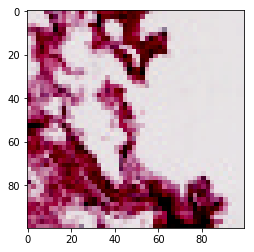

W0705 07:57:07.016893 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


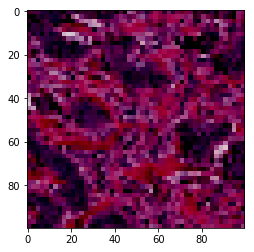

W0705 07:57:07.166524 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


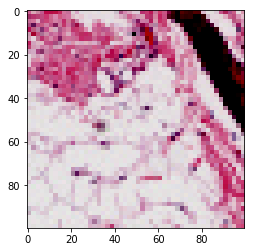

W0705 07:57:07.326297 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


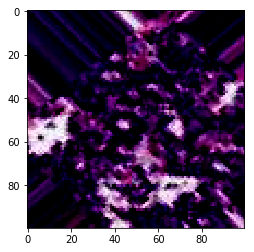

W0705 07:57:07.495761 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


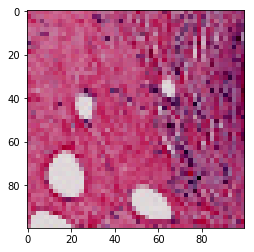

W0705 07:57:07.656702 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


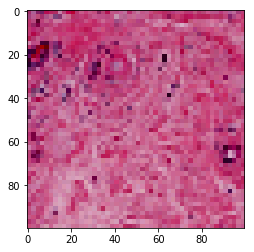

W0705 07:57:07.812232 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


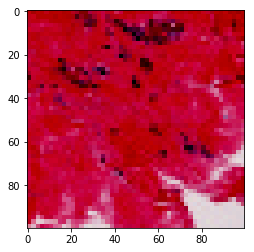

W0705 07:57:07.967997 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


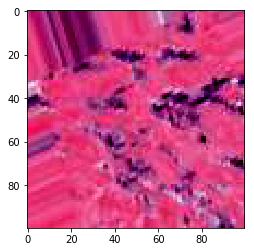

W0705 07:57:08.136427 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


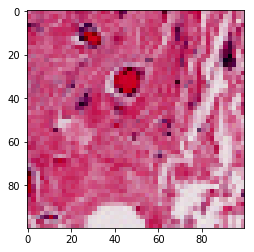

W0705 07:57:08.292384 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


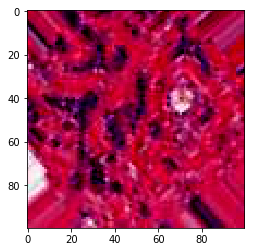

W0705 07:57:08.463658 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


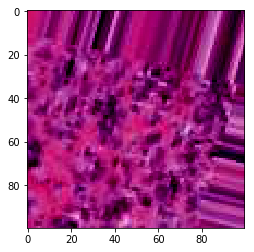

W0705 07:57:08.628457 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


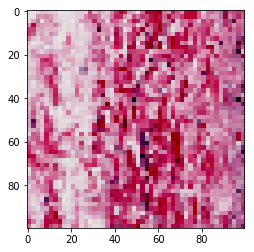

W0705 07:57:08.799802 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


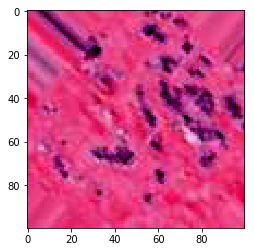

W0705 07:57:08.964831 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


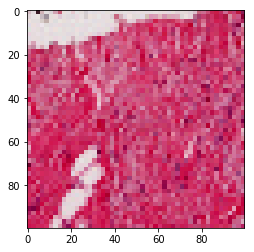

W0705 07:57:09.116797 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


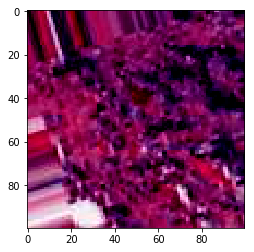

W0705 07:57:09.280589 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


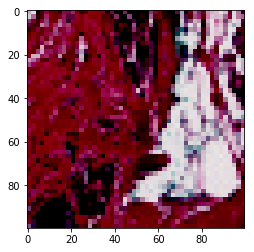

W0705 07:57:09.454341 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


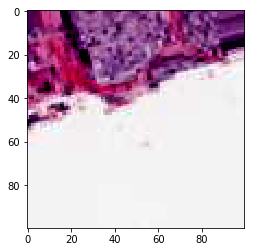

W0705 07:57:09.608534 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


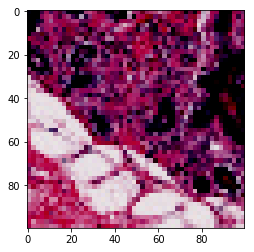

W0705 07:57:09.754291 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


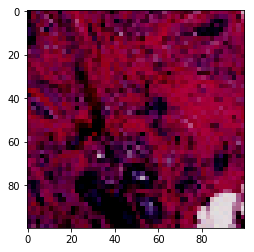

IDC negative


W0705 07:57:10.095075 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


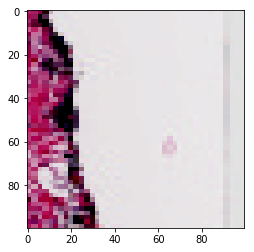

W0705 07:57:10.238192 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive


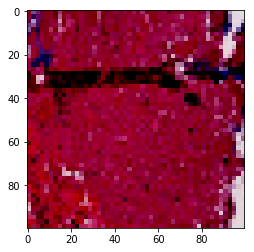

In [0]:
x, y = train_batches_bench.next()
for i in range(0,25):
    image = x[i]
    label = y[i]
    if np.argmax(label, axis=0) == 0:
      print('IDC negative')
    if np.argmax(label, axis=0) == 1:
      print('IDC positive')
    plt.imshow(image)
    plt.show()

In [0]:
# Get the labels that are associated with each index
print(valid_batches_bench.class_indices)

{'0': 0, '1': 1}


In [0]:
class_weights={
    0: 1.0, # negative
    1: 1.0, # postive 
    # make model more sensitive to positive class if necessary
}

## Train Benchmark Model

In [0]:
# Build Benchmark Model
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as K

benchmark = Sequential()
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='valid', input_shape=(image_size, image_size, 3)))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='valid'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='valid'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Dropout(0.35))
benchmark.add(Flatten())
benchmark.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
benchmark.add(Dropout(0.5))
benchmark.add(Dense(2, activation='softmax'))
benchmark.summary()

W0705 07:57:13.341380 140708348782464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 07:57:13.399381 140708348782464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 07:57:13.428288 140708348782464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 07:57:13.463195 140708348782464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0705 07:57:13.493626 140708348782464 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
__________

In [0]:
# Compile Benchmark Model
from keras import metrics
benchmark.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0705 07:58:54.971532 140708348782464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 07:58:54.996538 140708348782464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0705 07:58:55.001662 140708348782464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Checkpointer
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='breast_histopathology_bench_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_benchmark = benchmark.fit_generator(train_batches_bench, 
                                            steps_per_epoch=train_steps, 
                                            class_weight=class_weights,
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_benchmark], 
                                            epochs=50, 
                                            verbose=1)

Epoch 1/50
535/535 [==============================] - 275s 514ms/step - loss: 0.4288 - acc: 0.8643 - val_loss: 0.3955 - val_acc: 0.8490

Epoch 00001: val_loss improved from inf to 0.39554, saving model to breast_histopathology_bench_best.hdf5
Epoch 2/50
535/535 [==============================] - 187s 349ms/step - loss: 0.2834 - acc: 0.8873 - val_loss: 0.3667 - val_acc: 0.8475

Epoch 00002: val_loss improved from 0.39554 to 0.36667, saving model to breast_histopathology_bench_best.hdf5
Epoch 3/50
535/535 [==============================] - 157s 293ms/step - loss: 0.2766 - acc: 0.8907 - val_loss: 0.3672 - val_acc: 0.8520

Epoch 00003: val_loss did not improve from 0.36667
Epoch 4/50
535/535 [==============================] - 141s 263ms/step - loss: 0.2683 - acc: 0.8942 - val_loss: 0.3672 - val_acc: 0.8455

Epoch 00004: val_loss did not improve from 0.36667
Epoch 5/50
535/535 [==============================] - 141s 263ms/step - loss: 0.2635 - acc: 0.8970 - val_loss: 0.3705 - val_acc: 0.850

## Benchmark Model Evaluation

In [0]:
def plot_training(history):
  
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

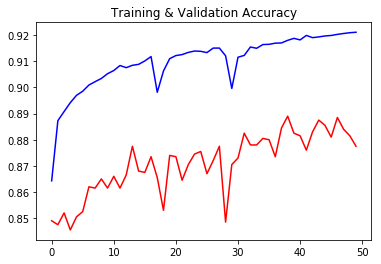

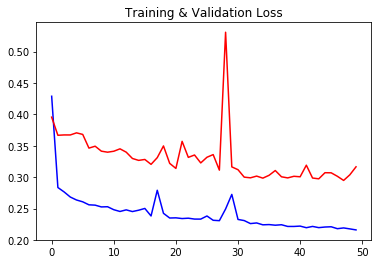

In [0]:
plot_training(history_benchmark)

In [0]:
# Load Weights of the Baseline Model
benchmark.load_weights('breast_histopathology_bench_best.hdf5')

In [0]:
# Test Predictions
preds = benchmark.predict_generator(test_batches_bench, steps=len(df_test), verbose=1)

10408/10408 [==============================] - 21s 2ms/step


In [0]:
# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_bench.classes

In [0]:
# Evaluate
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.730%
Balanced Accuracy: 0.608%


In [0]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(['negative', 'positive']))
  plt.xticks(tick_marks, ['negative', 'positive'])
  plt.yticks(tick_marks, ['negative', 'positive'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

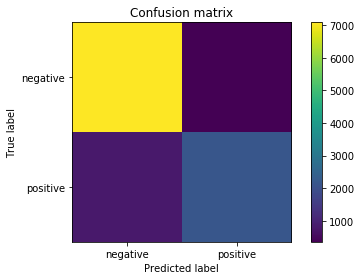

In [0]:
matrix()

In [0]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[7081,  364],
       [ 814, 2149]])

In [0]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.90      0.95      0.92      7445
    positive       0.86      0.73      0.78      2963

    accuracy                           0.89     10408
   macro avg       0.88      0.84      0.85     10408
weighted avg       0.89      0.89      0.88     10408



W0705 09:54:03.299548 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 99.99%
Predicted Positive Probability: 0.01%


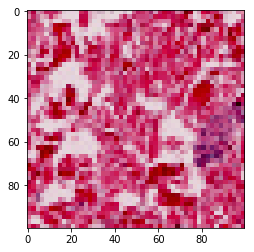

W0705 09:54:03.455496 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 97.08%
Predicted Positive Probability: 2.92%


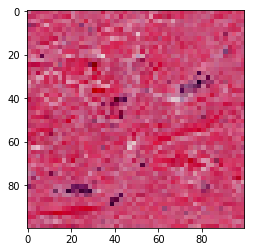

W0705 09:54:03.612364 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 99.20%
Predicted Positive Probability: 0.80%


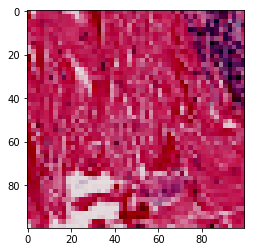

W0705 09:54:03.782627 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 46.25%
Predicted Positive Probability: 53.75%


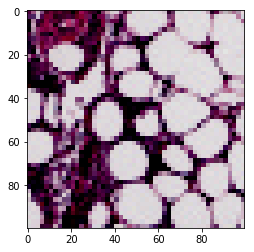

W0705 09:54:03.937092 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 99.93%
Predicted Positive Probability: 0.07%


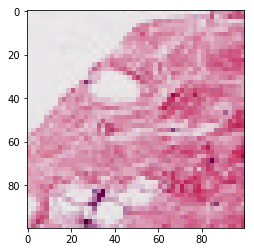

W0705 09:54:04.096251 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 97.39%
Predicted Positive Probability: 2.61%


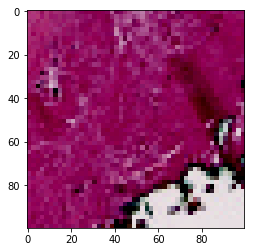

W0705 09:54:04.252338 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Predicted Negative Probability: 100.00%
Predicted Positive Probability: 0.00%


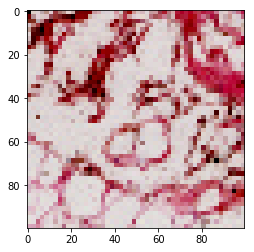

W0705 09:54:04.408295 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Predicted Negative Probability: 12.97%
Predicted Positive Probability: 87.03%


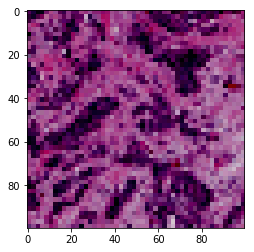

W0705 09:54:04.563257 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Predicted Negative Probability: 19.45%
Predicted Positive Probability: 80.55%


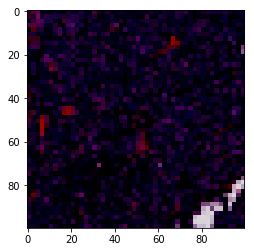

In [0]:
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  if np.argmax(label, axis=0) == 0:
      print('IDC negative')
  if np.argmax(label, axis=0) == 1:
    print('IDC positive')

  prob = benchmark.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Predicted Negative Probability: {(b*100):1.2f}%')
      print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

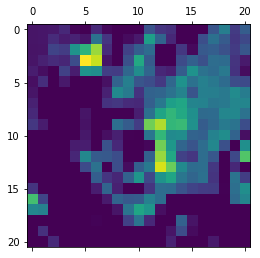

W0705 10:56:52.070436 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


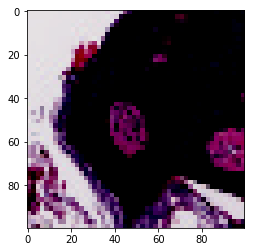

In [0]:
# Class Activation Maps

x, y = valid_batches_bench.next()

output = benchmark.output[:, y_pred[0]]
last_conv_layer = benchmark.layers[4]
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([benchmark.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

plt.imshow(x[0])
plt.show()

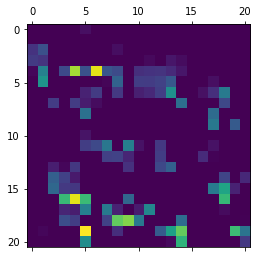

W0705 11:00:11.614093 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


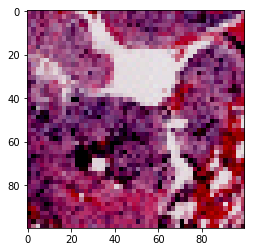

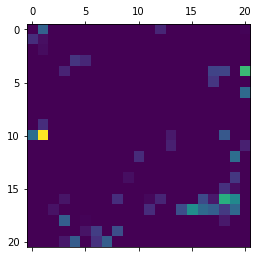

W0705 11:00:13.174602 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


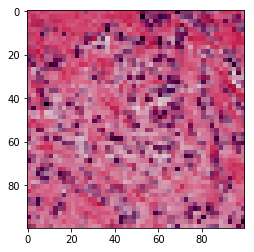

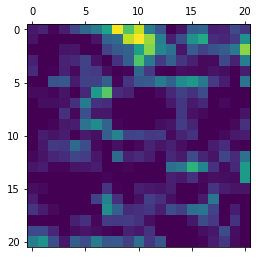

W0705 11:00:14.709522 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


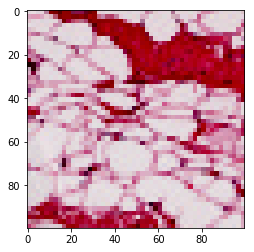

In [0]:
for k in range(0,3):
  
  x, y = valid_batches_bench.next()

  output = benchmark.output[:, y_pred[0]]
  last_conv_layer = benchmark.layers[4]
  grads = K.gradients(output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([benchmark.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  plt.matshow(heatmap)
  plt.show()

  plt.imshow(x[0])
  plt.show()
  
  print('\n')

In [0]:
# Get filters and biases

def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name, filters.shape)
    return filter_whole, layer_whole

In [0]:
filter_whole, layer_whole = get_name_layer_filters(benchmark)

conv2d_1 (3, 3, 3, 16)
conv2d_2 (3, 3, 16, 32)
conv2d_3 (3, 3, 32, 64)


In [0]:
filters, biases = benchmark.layers[2].get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 16, 32)
(32,)


In [0]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

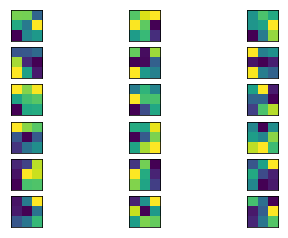

In [0]:
# Plot the filters

n_filters = 6
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

In [0]:
from keras.models import Model
model_feature = Model(inputs=benchmark.inputs, outputs=benchmark.layers[2].output)

In [0]:
x, y = valid_batches_bench.next()
test_label = y[1]
test_image = x[1]
test_image_np = np.expand_dims(test_image, axis=0)

W0705 10:46:30.781285 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative


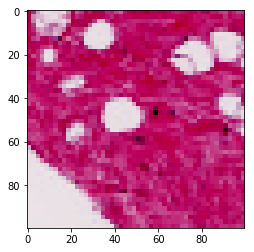

In [0]:
plt.imshow(test_image)
if np.argmax(test_label, axis=0) == 0:
  print('IDC negative')
if np.argmax(test_label, axis=0) == 1:
  print('IDC positive')

In [0]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 47, 47, 32)

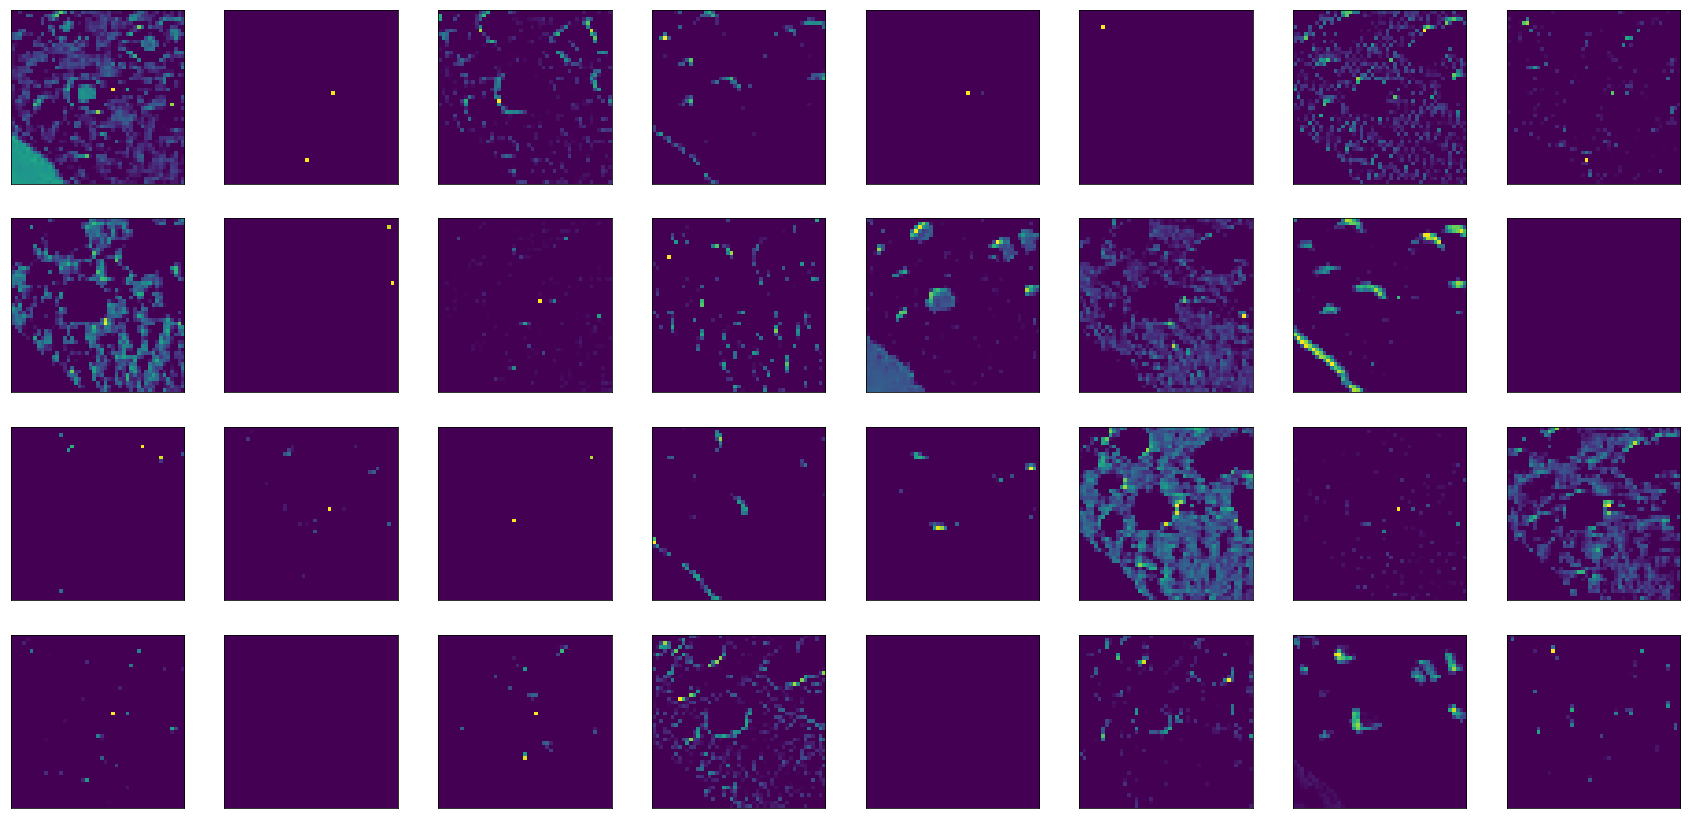

In [0]:
pyplot.figure(figsize=(30,30))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

## Train A Transfer Learning Model Including Benchmark Model's Weights - did not improve accuracy

In [0]:
# Load Pre-Trained Model
from keras.applications.inception_v3 import InceptionV3
base = InceptionV3(include_top=False, weights='imagenet', pooling=None, input_shape=(image_size, image_size, 3))

In [0]:
# Build Transfer Learning Model

from keras.models import Model

last = base.output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(2, activation='softmax')(x)

transfer = Model(base.input, preds)
transfer.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 49, 49, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 49, 49, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_5 (

In [0]:
# Load Weights of the Benchmark Model
base.load_weights('breast_histopathology_bench_best.hdf5', by_name=True)

In [0]:
# How many layers Base Model has
print(len(base.layers))

311


In [0]:
# Freeze original layers of Base Model
for layer in base.layers:
    layer.trainable = False

In [0]:
# Compile Transfer Learning Model
from keras import metrics
transfer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input)

train_batches_transfer = datagen.flow_from_directory(train_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=train_batch_size)

valid_batches_transfer = datagen.flow_from_directory(valid_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=val_batch_size)

test_batches_transfer = datagen.flow_from_directory(test_path,
                                                    target_size=(image_size, image_size),
                                                    batch_size=1,
                                                    shuffle=False) # test dataset should not be shuffled

Found 382589 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 10408 images belonging to 2 classes.


In [0]:
# Checkpointer
checkpointer_transfer = ModelCheckpoint(filepath='breast_histopathology_transfer_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_transfer = transfer.fit_generator(train_batches_transfer, 
                                       steps_per_epoch=train_steps, 
                                       class_weight=class_weights,
                                       validation_data=valid_batches_transfer,
                                       validation_steps=val_steps,
                                       callbacks=[checkpointer_transfer], 
                                       epochs=10, 
                                       verbose=1)

Epoch 1/10
535/535 [==============================] - 155s 289ms/step - loss: 0.5114 - acc: 0.7527 - val_loss: 0.8365 - val_acc: 0.7470

Epoch 00001: val_loss improved from inf to 0.83649, saving model to breast_histopathology_transfer_best.hdf5
Epoch 2/10
535/535 [==============================] - 142s 265ms/step - loss: 0.4774 - acc: 0.7731 - val_loss: 0.7317 - val_acc: 0.7470

Epoch 00002: val_loss improved from 0.83649 to 0.73175, saving model to breast_histopathology_transfer_best.hdf5
Epoch 3/10
535/535 [==============================] - 143s 267ms/step - loss: 0.4657 - acc: 0.7802 - val_loss: 0.7869 - val_acc: 0.7415

Epoch 00003: val_loss did not improve from 0.73175
Epoch 4/10
535/535 [==============================] - 143s 267ms/step - loss: 0.4603 - acc: 0.7831 - val_loss: 0.6807 - val_acc: 0.7355

Epoch 00004: val_loss improved from 0.73175 to 0.68072, saving model to breast_histopathology_transfer_best.hdf5
Epoch 5/10
535/535 [==============================] - 142s 265ms/s

In [0]:
# Load Weights of the Transfer Learning Model
model.load_weights('breast_histopathology_transfer_best.hdf5')

## Transfer Model Evaluation


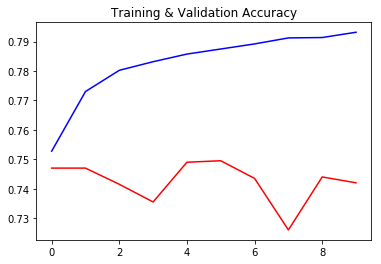

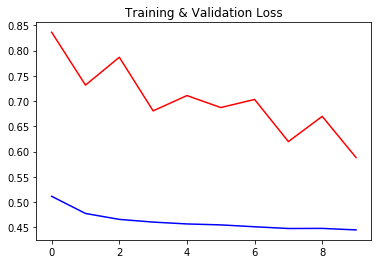

In [0]:
plot_training(history_transfer)

In [0]:
# Test Predictions
preds = transfer.predict_generator(test_batches_transfer, steps=len(df_test), verbose=1)

10408/10408 [==============================] - 122s 12ms/step


In [0]:
# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_transfer.classes

In [0]:
# Evaluate
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.730%
Balanced Accuracy: 0.608%


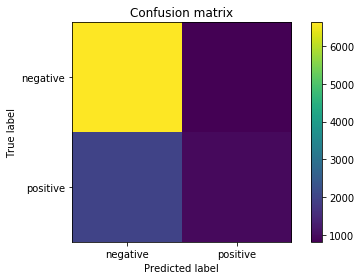

In [0]:
matrix()

In [0]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[6626,  819],
       [1996,  967]])

In [0]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.77      0.89      0.82      7445
    positive       0.54      0.33      0.41      2963

    accuracy                           0.73     10408
   macro avg       0.65      0.61      0.62     10408
weighted avg       0.70      0.73      0.71     10408



W0705 10:23:14.842383 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Prob Negative: 26.54%
Prob Positive 73.46%


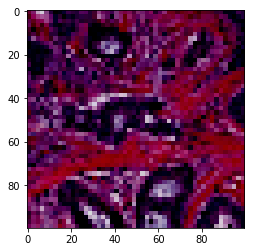

W0705 10:23:15.018095 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Prob Negative: 97.92%
Prob Positive 2.08%


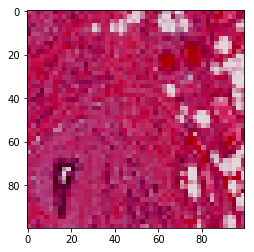

W0705 10:23:15.182743 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 85.84%
Prob Positive 14.16%


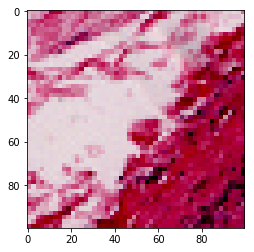

W0705 10:23:15.344450 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 11.36%
Prob Positive 88.64%


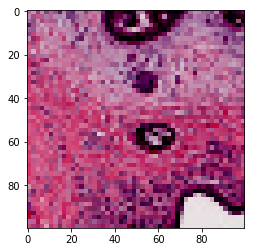

W0705 10:23:15.516248 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC positive
Prob Negative: 65.12%
Prob Positive 34.88%


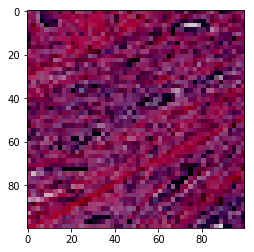

W0705 10:23:15.678421 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IDC negative
Prob Negative: 96.28%
Prob Positive 3.72%


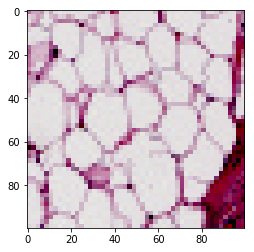

IDC negative
Prob Negative: 28.15%
Prob Positive 71.85%


W0705 10:23:15.849530 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


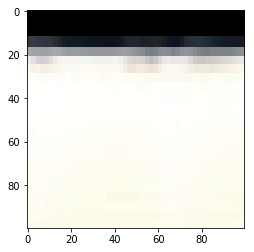

IDC negative
Prob Negative: 77.79%
Prob Positive 22.21%


W0705 10:23:16.042652 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


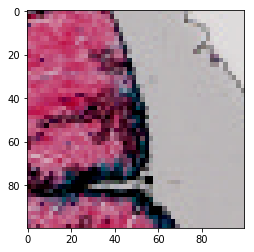

IDC negative


W0705 10:23:16.215715 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob Negative: 54.00%
Prob Positive 46.00%


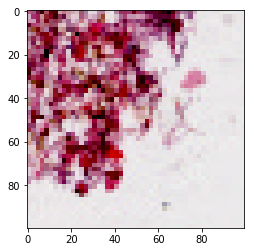

In [0]:
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  for j in label:
    if j == 1:
      print('IDC negative')
      break
    if j+1 == 1:
      print('IDC positive')
      break
    else:
      break

  prob = transfer.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Prob Negative: {(b*100):1.2f}%')
      print(f'Prob Positive {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

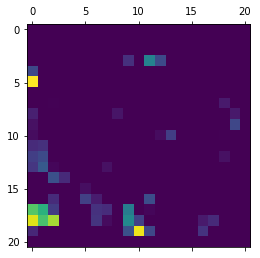

W0705 10:57:11.218339 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


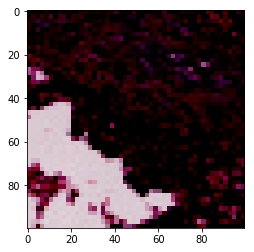

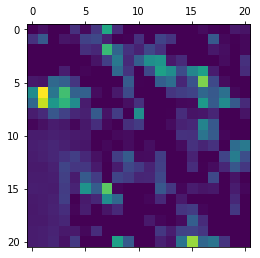

W0705 10:57:12.791469 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


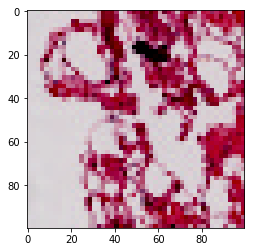

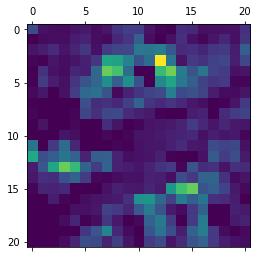

W0705 10:57:14.251602 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


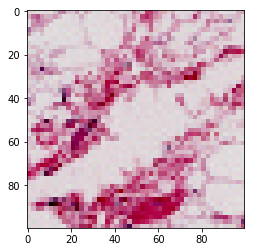

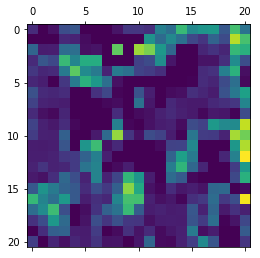

W0705 10:57:15.713506 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


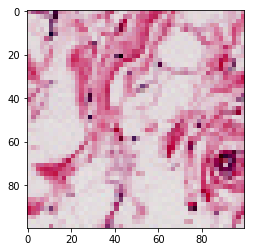

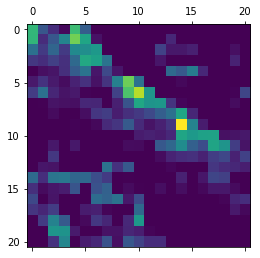

W0705 10:57:17.165421 140708348782464 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


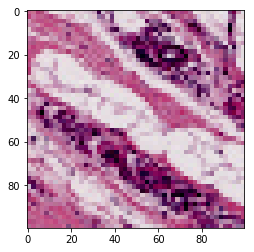

In [0]:
# Class Activation Maps

for k in range(0,5):
  
  x, y = valid_batches_bench.next()

  output = benchmark.output[:, y_pred[0]]
  last_conv_layer = benchmark.layers[4]
  grads = K.gradients(output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([benchmark.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  plt.matshow(heatmap)
  plt.show()

  plt.imshow(x[0])
  plt.show()
  
  print('\n')